In [1]:
import scipy.io as sio
from scipy.fft import fft
import os,glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mat4py import loadmat
import librosa
import signal_utll

In [2]:
Hz_Lthr, Hz_Hthr = 0, 0.7
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat'

In [3]:
signal =  loadmat(file)

In [4]:
signal.keys()

dict_keys(['Fs', 'data'])

In [5]:
!pip install pysoundfile

You should consider upgrading via the '/Users/ayub/anaconda3/bin/python -m pip install --upgrade pip' command.


In [6]:
data = [item for sublist in signal['data'] for item in sublist]

In [7]:
from scipy.fftpack import rfft, irfft
from librosa.core import istft

Y=np.array(data)
spec = librosa.feature.melspectrogram(y=Y, sr=signal['Fs'])
spec

array([[1.85319943e+02, 1.24212521e+02, 2.29684155e+01, ...,
        3.22805406e+01, 5.06527463e+01, 2.71779701e+02],
       [5.90654786e+00, 1.13773858e+01, 2.60681698e+01, ...,
        7.30695411e+00, 6.98345333e+00, 1.57749181e+01],
       [3.30286536e+00, 3.29793900e+00, 4.80995645e+00, ...,
        1.86720099e-01, 3.83196387e-01, 2.12770164e-01],
       ...,
       [6.95785290e-03, 2.46539420e-02, 4.06707380e-02, ...,
        8.82029784e-03, 9.37175830e-03, 8.12285682e-03],
       [4.21935315e-03, 1.09622706e-02, 2.15112727e-02, ...,
        8.69613569e-03, 8.29058634e-03, 6.32857899e-03],
       [1.16702362e-03, 3.30115815e-03, 8.76748361e-03, ...,
        2.45836996e-03, 1.85731264e-03, 3.51855552e-03]])

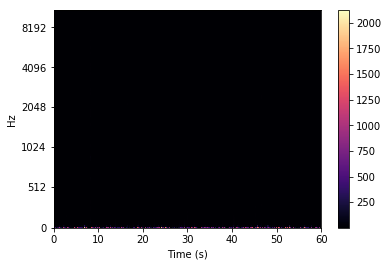

In [8]:
import librosa.display
sr=signal['Fs']
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()


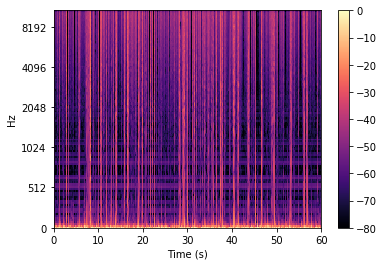

In [9]:
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();

In [10]:
#https://librosa.org/doc/latest/generated/librosa.feature.rms.html
rms_values = librosa.feature.rms(y=Y)

In [11]:
type(rms_values)

numpy.ndarray

In [12]:
rms_values.shape

(1, 5168)

In [13]:
rms_values

array([[0.11368649, 0.11388187, 0.09325953, ..., 0.0612875 , 0.12383786,
        0.16475451]])

In [14]:
def AVG(lst): 
    return sum(lst) / len(lst)

rms_values= [item for sublist in rms_values for item in sublist]

In [16]:
sum(rms_values)


1156.4357187703579

In [17]:
#https://librosa.org/doc/latest/generated/librosa.feature.spectral_centroid.html

cent = librosa.feature.spectral_centroid(y=Y, sr=signal['Fs'])
cent.shape

(1, 5168)

In [19]:
spec_bw = librosa.feature.spectral_bandwidth(y=Y, sr=sr)
spec_bw.shape

(1, 5168)

[Text(0.5,1,'log Power spectrogram')]

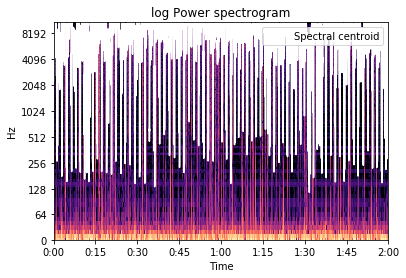

In [26]:
import matplotlib.pyplot as plt
S, phase = librosa.magphase(librosa.stft(y=Y))
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')


In [27]:
y=np.array(data)
sr=signal['Fs']
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

In [28]:
contrast.shape

(7, 5168)

In [29]:
contrast[:20]

array([[29.79603631, 24.17824261, 26.06526324, ..., 16.80020698,
        16.81888108, 22.51693755],
       [21.97984469, 10.5408097 ,  7.99285572, ..., 12.16167571,
         6.70254349, 15.17015631],
       [20.18810039, 31.57942685, 13.66648836, ..., 17.1001197 ,
        17.16261367,  8.61158736],
       ...,
       [18.60703045,  9.72995099,  9.79531077, ..., 14.80117693,
        13.36904549, 14.04235407],
       [23.69744652, 14.43114358, 13.17709675, ..., 12.27660125,
        16.1601101 , 15.19174122],
       [26.27003209, 15.9527337 , 16.04387049, ..., 15.7810335 ,
        15.22005567, 15.76668257]])

In [30]:
#https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_stft

array([[0.75506636, 0.59153976, 0.77029573, ..., 0.62069184, 0.73615429,
        0.68778973],
       [0.82450078, 0.68859403, 0.83496856, ..., 0.73306648, 0.82587387,
        0.78687078],
       [0.89642546, 0.80952385, 0.91516688, ..., 0.86473989, 0.93768769,
        0.88020438],
       ...,
       [0.82642342, 0.66992063, 0.65826957, ..., 0.59927101, 0.69150911,
        0.71267744],
       [0.73147857, 0.54825324, 0.6242984 , ..., 0.50133379, 0.61761754,
        0.61142771],
       [0.68731266, 0.49979775, 0.65497703, ..., 0.48868307, 0.61952784,
        0.58339444]])

In [31]:
chroma_stft.shape

(12, 5168)

In [32]:
#https://librosa.org/doc/latest/generated/librosa.feature.poly_features.html
S = np.abs(librosa.stft(y))
p0 = librosa.feature.poly_features(S=S, order=0)

In [33]:
p0

array([[0.42163582, 0.48913016, 0.4867909 , ..., 0.29377702, 0.32118167,
        0.50045018]])

In [34]:
p0.shape

(1, 5168)

In [35]:
p1 = librosa.feature.poly_features(S=S, order=1)

In [36]:
p1

array([[-1.24242467e-04, -6.74797678e-05, -4.54180814e-07, ...,
        -7.88842412e-06, -1.57307689e-05, -1.18788728e-04],
       [ 1.10652242e+00,  8.61112378e-01,  4.89294571e-01, ...,
         3.37261957e-01,  4.07897537e-01,  1.15527304e+00]])

In [37]:
p1.shape

(2, 5168)

In [38]:
#https://librosa.org/doc/latest/generated/librosa.feature.chroma_cens.html
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_cens

array([[0.4532347 , 0.4554091 , 0.45698849, ..., 0.43405244, 0.42788967,
        0.42189244],
       [0.45380811, 0.45688158, 0.45989906, ..., 0.3923654 , 0.38651284,
        0.37984399],
       [0.25664896, 0.26471556, 0.27323709, ..., 0.37755853, 0.36950523,
        0.36125281],
       ...,
       [0.00338694, 0.00566927, 0.00861364, ..., 0.24282756, 0.24350585,
        0.24370133],
       [0.0061402 , 0.0092547 , 0.01304522, ..., 0.24428348, 0.24407151,
        0.24382512],
       [0.00338694, 0.00566927, 0.00861364, ..., 0.05427961, 0.04957789,
        0.04551224]])

In [39]:
chroma_cens.shape

(12, 5168)

In [40]:
#https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html

mfcc=librosa.feature.mfcc(y=y, sr=sr)
mfcc

array([[-354.96535255, -330.6898642 , -313.61592592, ..., -341.24245655,
        -339.98243555, -332.51551593],
       [  -7.09845027,  -31.67935309,  -46.02939538, ...,  -19.04529098,
         -21.73263083,   -9.12954278],
       [  64.7612123 ,   58.92431632,   51.00214466, ...,   61.83167971,
          61.83048513,   68.44950572],
       ...,
       [   4.62465022,    4.37085263,    6.43269363, ...,    0.42180067,
           4.61515226,    8.00229441],
       [   1.32572655,    2.14485032,    6.81178369, ...,   -4.86347607,
          -1.15156831,   -1.8976006 ],
       [  -2.41037653,    1.1973762 ,    2.64730122, ...,   -2.14161988,
           3.04386409,    0.85548514]])

In [41]:
mfcc.shape

(20, 5168)

In [43]:
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

In [44]:
tonnetz.shape

(6, 5168)

In [46]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)

In [47]:
zero_crossing_rate.shape

(1, 5168)

In [48]:
zero_crossing_rate

array([[0.03173828, 0.05371094, 0.05371094, ..., 0.05859375, 0.05859375,
        0.03662109]])

In [49]:
spectral_flatness = librosa.feature.spectral_flatness(y=y)
spectral_flatness.shape

(1, 5168)

In [50]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y)
spectral_rolloff.shape

(1, 5168)

In [52]:
total = sum(spectral_rolloff)

In [53]:
total.shape

(5168,)

In [54]:
spectral_rolloff

array([[7999.58496094, 9205.44433594, 9636.10839844, ..., 9539.20898438,
        9388.4765625 , 8537.91503906]])

In [55]:
total

array([7999.58496094, 9205.44433594, 9636.10839844, ..., 9539.20898438,
       9388.4765625 , 8537.91503906])

In [11]:
file = '../datasets/Age_C/Age_C_Female/Sub 60/60Neck_L_A_3 .mat'
signal =  loadmat(file)


In [12]:
data = [item for sublist in signal['data'] for item in sublist]
Y=np.array(data)
sr=signal['Fs']

In [13]:
rms_values = librosa.feature.rms(y=Y)

In [14]:
rms_values.shape

(1, 5168)

In [16]:
rms_values= [item for sublist in rms_values for item in sublist]

In [17]:
rms_sum = sum(rms_values)

In [18]:
rms_sum

611.1835229859689

In [19]:
sum(rms_values)/len(rms_values)

0.11826306559326023